In [104]:
import pandas as pd

df = pd.read_excel('spotify dataset.csv.xlsx')
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [105]:
df.to_csv('clean_spotify.csv', index=False)

In [106]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

 Data Analysis & Visualizations

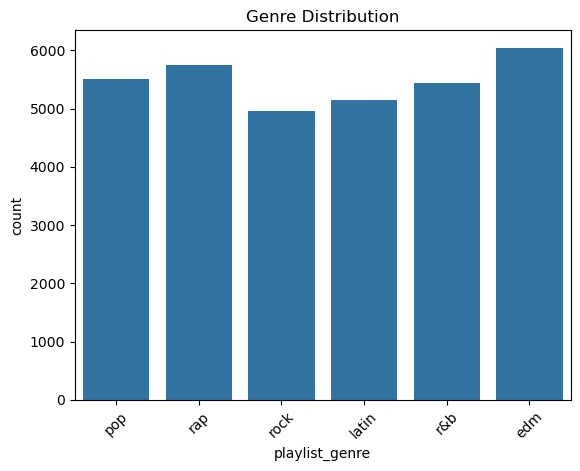

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='playlist_genre')
plt.xticks(rotation=45)
plt.title('Genre Distribution')
plt.show()

In [ ]:
Feature Distributions

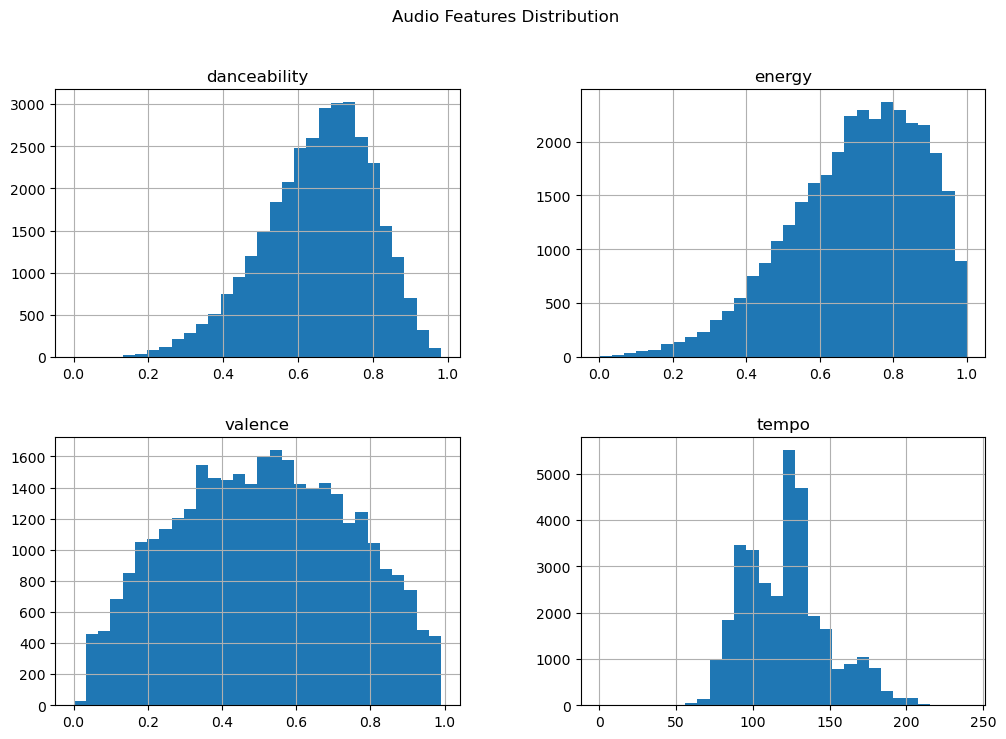

In [110]:
df[['danceability', 'energy', 'valence', 'tempo']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Audio Features Distribution')
plt.show()

Boxplots for Outliers

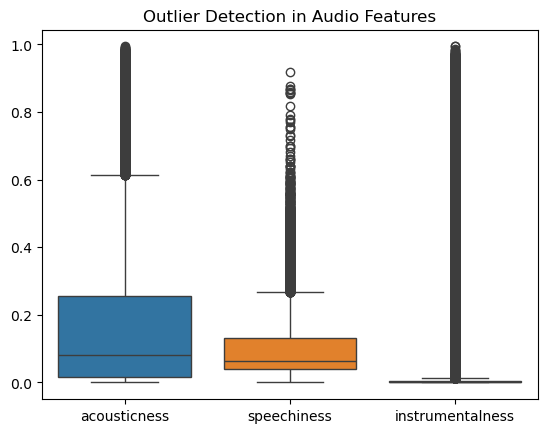

In [112]:
sns.boxplot(data=df[['acousticness', 'speechiness', 'instrumentalness']])
plt.title('Outlier Detection in Audio Features')
plt.show()

Correlation Matrix

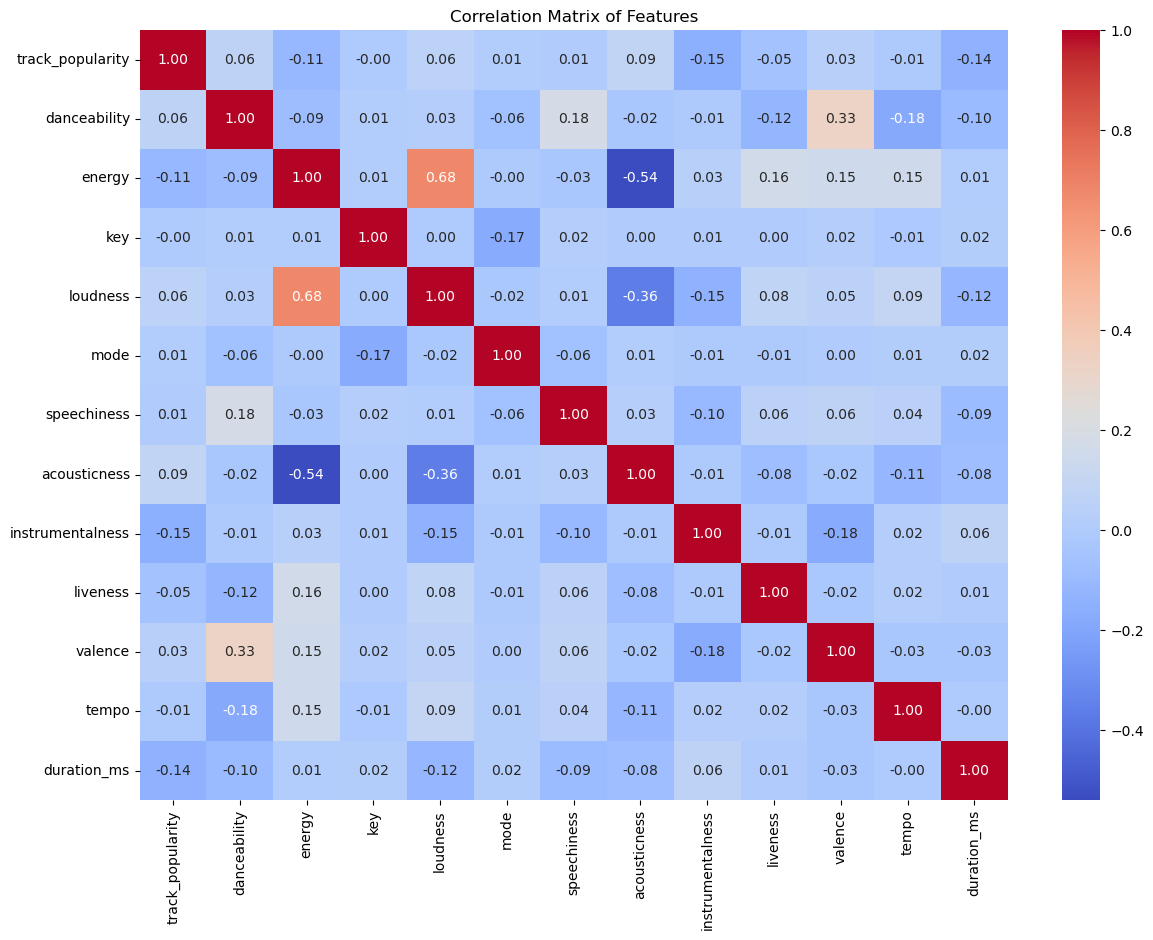

In [113]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Clustering by Genre / Playlist :

👉 Scale & Reduce :

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['danceability', 'energy', 'valence', 'tempo']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_scaled[:5])

[[ 0.64199032  1.20163701  0.03193526  0.04291783]
 [ 0.49036132  0.64336218  0.78252071 -0.77728163]
 [ 0.13885773  1.28454912  0.43939593  0.11622427]
 [ 0.4352235   1.27902164 -1.00172814  0.03994394]
 [-0.03344795  0.7428567   0.91977062  0.11503472]]


👉 KMeans Clustering

In [115]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)
print(X_pca[:5]) 

[[ 0.35429747  0.90472068]
 [ 1.06037789  0.43261515]
 [ 0.20490318  1.19784624]
 [-0.40172689  0.48640324]
 [ 0.41010036  1.02544289]]


👉 Visualize Clusters

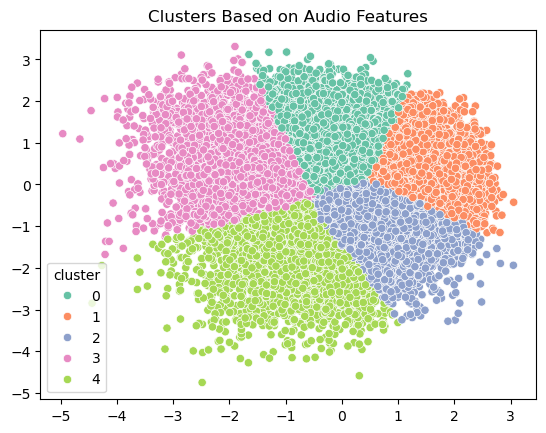

cluster
0    7867
2    7503
1    6990
3    6283
4    4184
Name: count, dtype: int64
                                          track_name playlist_genre  cluster
0  I Don't Care (with Justin Bieber) - Loud Luxur...            pop        0
1                    Memories - Dillon Francis Remix            pop        1
2                    All the Time - Don Diablo Remix            pop        0
3                  Call You Mine - Keanu Silva Remix            pop        0
4            Someone You Loved - Future Humans Remix            pop        0


In [116]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2')
plt.title('Clusters Based on Audio Features')
plt.show()
print(df['cluster'].value_counts())
print(df[['track_name', 'playlist_genre', 'cluster']].head())

Build the Recommendation System :

In [88]:
print(df.columns.tolist())

['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'cluster']


In [95]:
def show_recommendations():
    return recommendations[['track_name', 'playlist_genre']]

In [117]:
def recommend_song(df, song_title):
    try:
        df['track_name'] = df['track_name'].astype(str).str.lower().str.strip()
        song_title = song_title.lower().strip()
        
        track_list = df[df['track_name'] == song_title]
        if track_list.empty:
            matches = df[df['track_name'].str.contains(song_title.split()[0])]
            return f"Song not found. Did you mean: {matches['track_name'].unique()[:5]}"
        
        cluster_id = track_list['cluster'].values[0]
        recommendations = df[
            (df['cluster'] == cluster_id) & 
            (df['track_name'] != song_title)
        ]
        
        if recommendations.empty:
            return "No similar songs found in the same cluster."
        
        return recommendations[['track_name', 'track_artist', 'playlist_genre']].sample(
            min(len(recommendations), 5)
        )
    
    except Exception as e:
        return f"Error: {e}"

In [118]:
recommend_song(df, 'All the Time - Don Diablo Remix')

,track_name,track_artist,playlist_genre
24975,sex me,H-Town,r&b
23626,i'll do for ya,Johnnie Floss,r&b
30610,just hold on - dvbbs remix,Steve Aoki,edm
27829,tear it,Raven & Kreyn,edm
32634,wake turbulence - david tort remix,Koen Groeneveld,edm
